# 反爬：驗證碼處理

* 了解「驗證碼機制」的反爬蟲機制
* 「驗證碼機制」反爬蟲的因應策略


## 作業目標

* 讀讀看「test」資料夾下的圖檔！
* 像 test/test2.png 這種複雜的圖片怎麼辦？


### 讀讀看「test」資料夾下的圖檔！

In [2]:
import requests
import pytesseract
from PIL import Image
from io import BytesIO

code1 = 619121


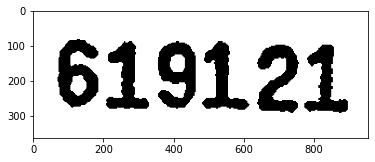

In [3]:
# test1.png
im1 = Image.open("0.data/test1.png")
# 印出
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(im1)
# 辨識
code = pytesseract.image_to_string(im1)
print('code1 =', code)

### 像 test/test2.png 這種複雜的圖片怎麼辦？

code2 = 1413


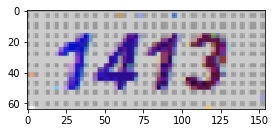

In [4]:
# test2.png
im2 = Image.open("0.data/test2.png")
# 印出
plt.subplot(212)
plt.imshow(im2)
# 降躁：如果圖片偏暗，給值降低(0為黑，255為白)
def convert_Image(img, standard=127.5):
    # 轉為黑白模式'L'
    image = img.convert('L')
    # 二值化：根據閾值standard=255/2，將所有像素轉為0(黑色)或255(白色)
    pixels = image.load()
    for x in range(image.width):
        for y in range(image.height):
            if pixels[x, y] > standard:
                pixels[x, y] = 255
            else:
                pixels[x, y] = 0
    return image
im2 = convert_Image(im2)
# 辨識
code = pytesseract.image_to_string(im2)
print('code2 =', code)